# Module 5: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand what can cause violations in the linear regression assumptions.
2. Enhance your skills in identifying and diagnosing violated assumptions.
3. Learn some basic methods of addressing violated assumptions.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(ggplot2)

## Problem 1: Let's Violate Some Assumptions!

When looking at a single plot, it can be difficult to discern the different assumptions being violated. In the following problem, you will simulate data that purposefully violates each of the four linear regression assumptions. Then we can observe the different diagnostic plots for each of those assumptions.

#### 1. (a) Linearity

Generate SLR data that violates the linearity assumption, but maintains the other assumptions. Create a scatterplot for these data using ggplot.

Then fit a linear model to these data and comment on where you can diagnose nonlinearity in the diagnostic plots.

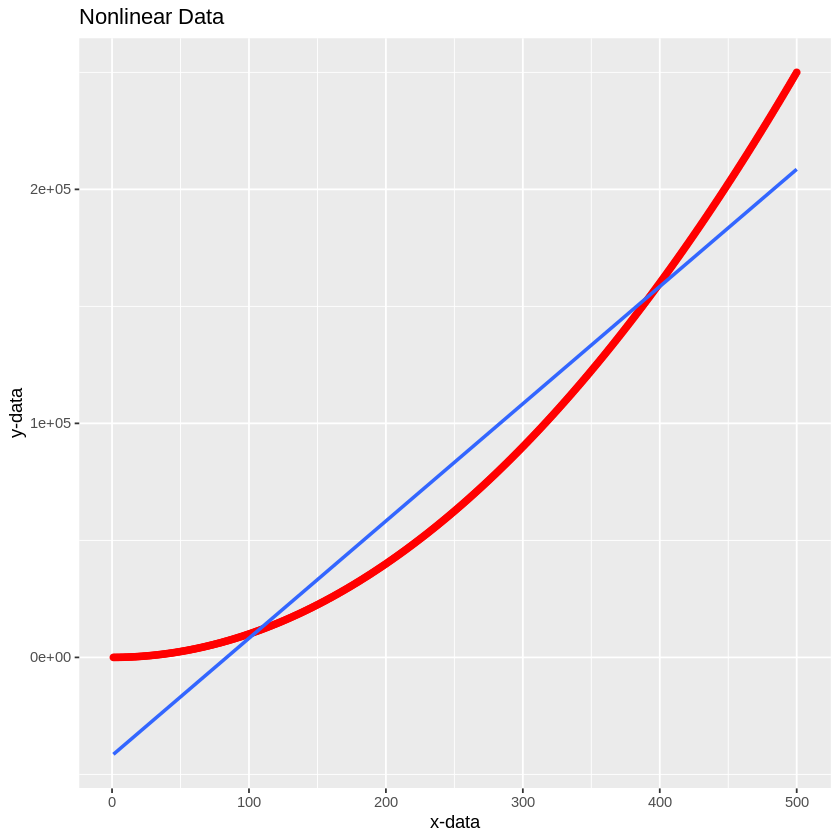

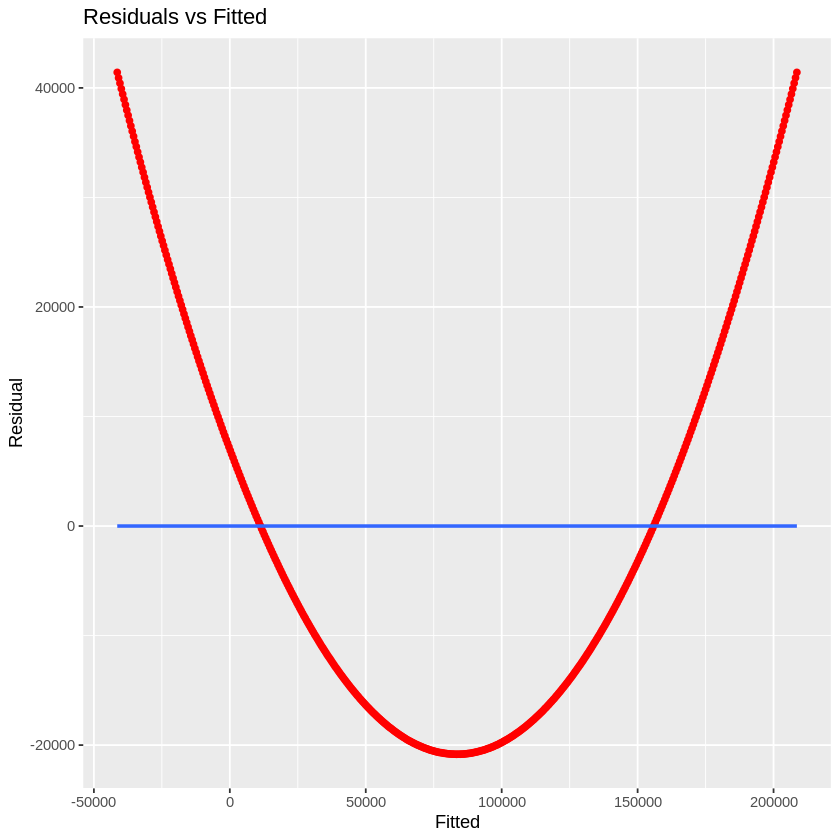

In [2]:
# Your Code Here
set.seed(53)

# Generate Data
n = 500
x = seq(1,n,1)  
y = 5*rnorm(length(x)) + x^2
a.data = data.frame(x=x,y=y)

# Fit Model and Predict
a.lmod = lm(data=a.data,formula=y~x)
a.diagnostic.data = data.frame(x=a.lmod$fitted,y=a.lmod$residuals)


# Diagnose Graphically
a.plot = ggplot(a.data, aes(x=x,y=y)) + geom_point(color="red") + 
         geom_smooth(data=a.data, method=lm, formula=y~x, se=FALSE) +
         labs(title="Nonlinear Data") + 
         ylab("y-data") + 
         xlab("x-data")

a.diagnostic.plot = ggplot(a.diagnostic.data,aes(x=x, y=y)) + 
                    geom_point(color="red") + 
                    geom_smooth(data=a.diagnostic.data,formula=y~x,method=lm,se=FALSE) + 
                    labs(title="Residuals vs Fitted") + 
                    ylab("Residual") + 
                    xlab("Fitted")

a.plot
a.diagnostic.plot

The scatter and residuals vs fitted plots above confirm that the data generated. Both graphs show that the data does not follow a linear relation. The scatter plot shows significant deviation from the line of fit, and the residual v fitted plot shows that the residuals make a parabola, which is nonlinear.

#### 1. (b) Homoskedasticity

Simulate another SLR dataset that violates the constant variance assumption, but maintains the other assumptions. Then fit a linear model to these data and comment on where you can diagnose non-constant variance in the diagnostic plots.

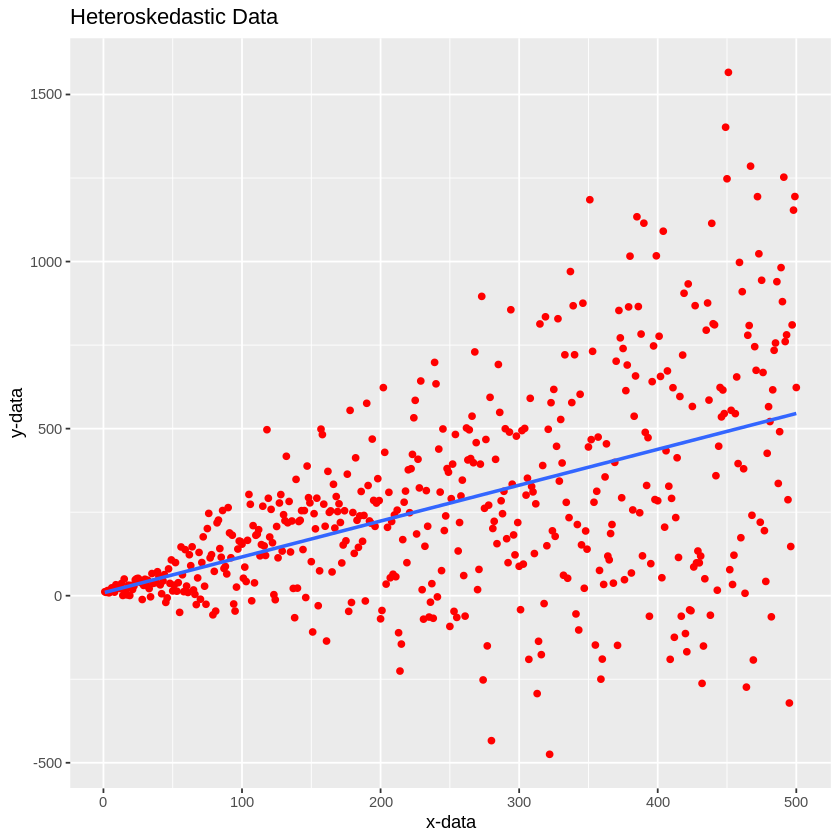

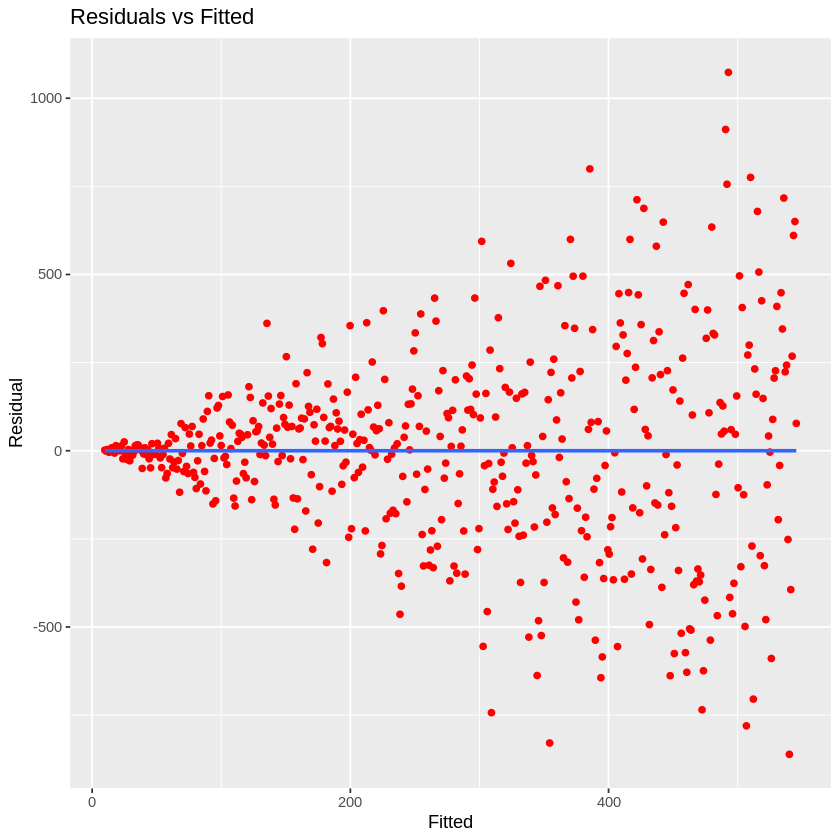

In [3]:
# Your Code Here
set.seed(53)

# Generate Data
n = 500
x = seq(1,n,1)  
y = 10 + x + rnorm(n,0.5,x)
b.data = data.frame(x=x,y=y)

# Fit Model and Predict
b.lmod = lm(data=b.data,formula=y~x)
b.diagnostic.data = data.frame(x=b.lmod$fitted,y=b.lmod$residuals)


# Diagnose Graphically
b.plot = ggplot(b.data, aes(x=x,y=y)) + geom_point(color="red") + 
         geom_smooth(data=b.data, method=lm, formula=y~x, se=FALSE) +
         labs(title="Heteroskedastic Data") + 
         ylab("y-data") + 
         xlab("x-data")

b.diagnostic.plot = ggplot(b.diagnostic.data,aes(x=x, y=y)) + 
                    geom_point(color="red") + 
                    geom_smooth(data=b.diagnostic.data,formula=y~x,method=lm,se=FALSE) + 
                    labs(title="Residuals vs Fitted") + 
                    ylab("Residual") + 
                    xlab("Fitted")


b.plot
b.diagnostic.plot

The trumpetting or fanning behavior in the plots above show that the variance is nonconstant and breaks the assumption of homoskedasticity.

#### 1. (c) Independent Errors

Repeat the above process with simulated data that violates the independent errors assumption.

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


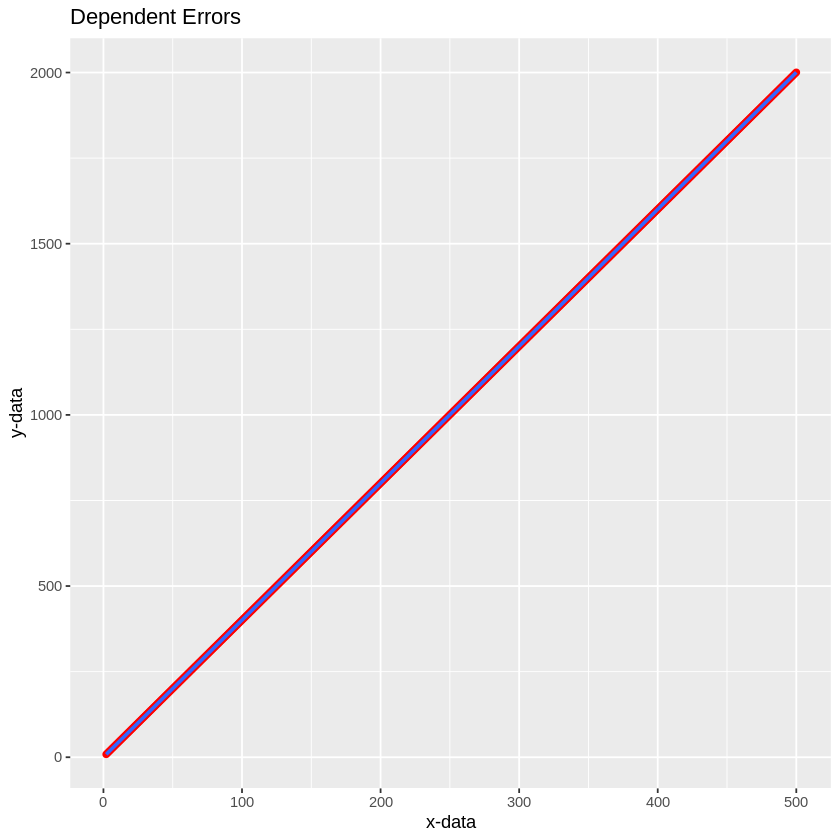

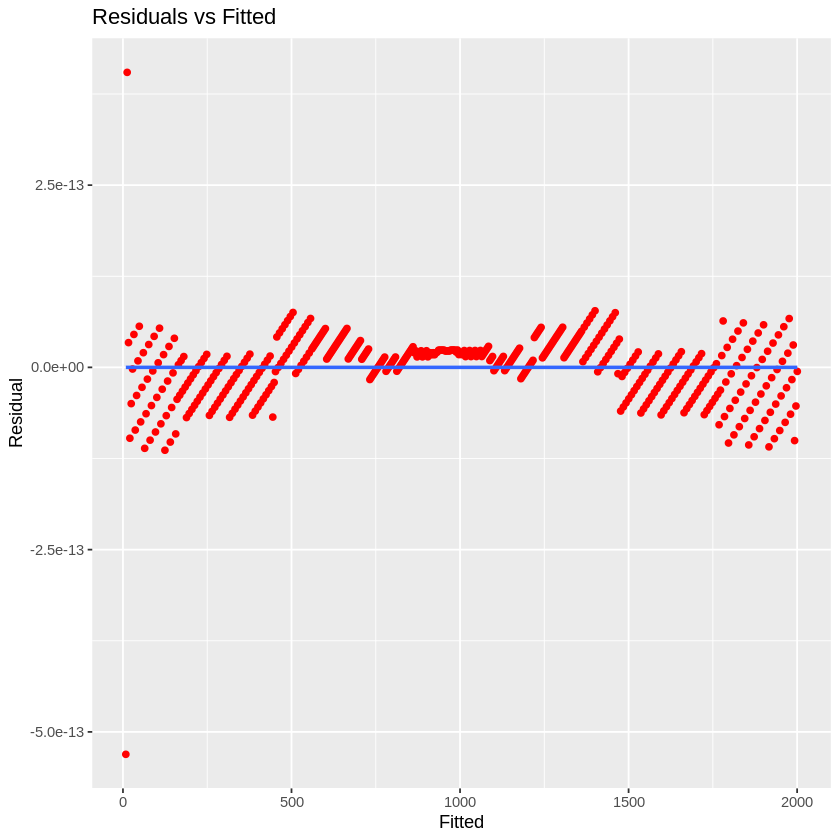

In [4]:
# Your Code Here
set.seed(53)
library(data.table)

# Generate Data
n = 500
x = seq(1,n,1) 
e = frollmean(x,2);
y = 1 + 3*x + e
c.data = data.frame(x=x,y=y)

# Fit Model and Predict
c.lmod = lm(data=c.data,formula=y~x)
c.diagnostic.data = data.frame(x=c.lmod$fitted,y=c.lmod$residuals)


# Diagnose Graphically
c.plot = ggplot(c.data, aes(x=x,y=y)) + geom_point(color="red") + 
         geom_smooth(data=c.data, method=lm, formula=y~x, se=FALSE) +
         labs(title="Dependent Errors") + 
         ylab("y-data") + 
         xlab("x-data")

c.diagnostic.plot = ggplot(c.diagnostic.data,aes(x=x, y=y)) + 
                    geom_point(color="red") + 
                    geom_smooth(data=c.diagnostic.data,formula=y~x,method=lm,se=FALSE) + 
                    labs(title="Residuals vs Fitted") + 
                    ylab("Residual") + 
                    xlab("Fitted")

c.plot
c.diagnostic.plot


The stratified pattern in the residual vs fitted plot shows that the data violates the independent errors assumption. The errors are visually dependent on each other.

#### 1. (d) Normally Distributed Errors

Only one more to go! Repeat the process again but simulate the data with non-normal errors.

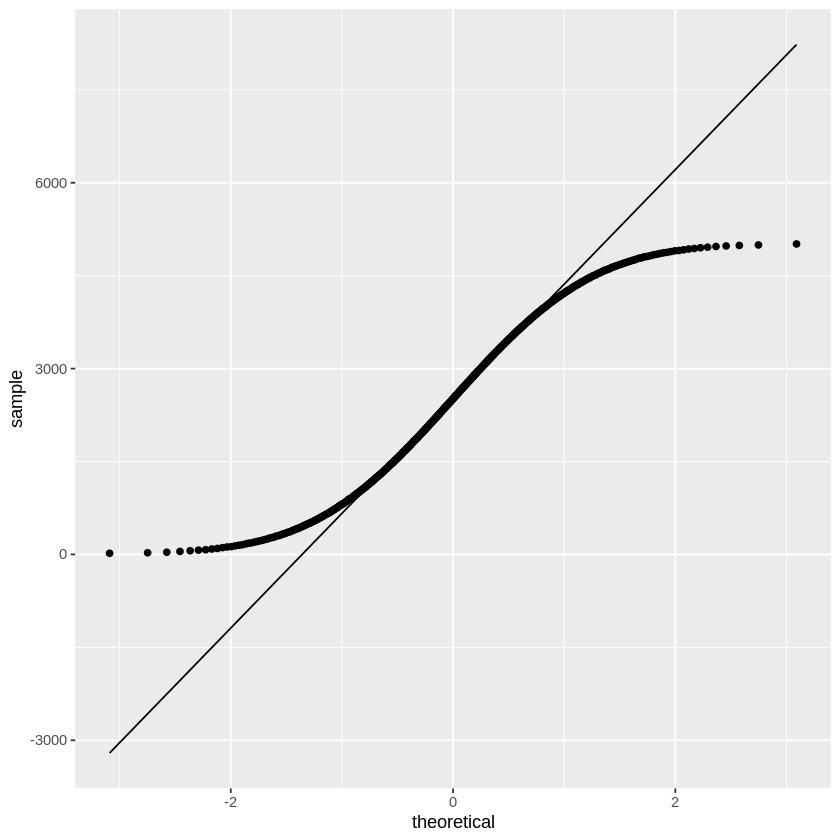

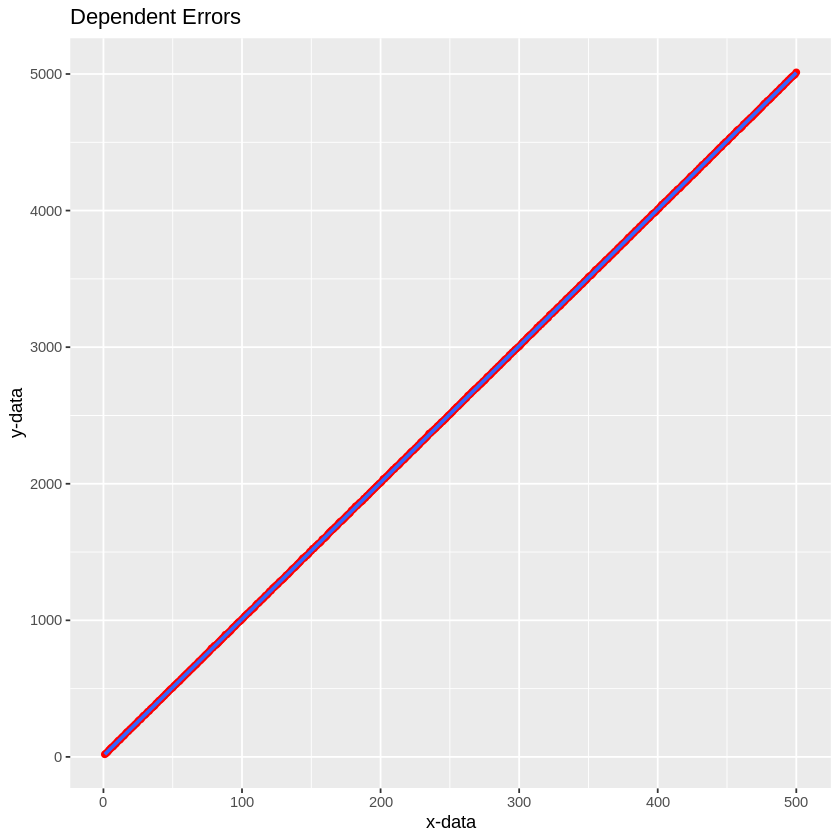

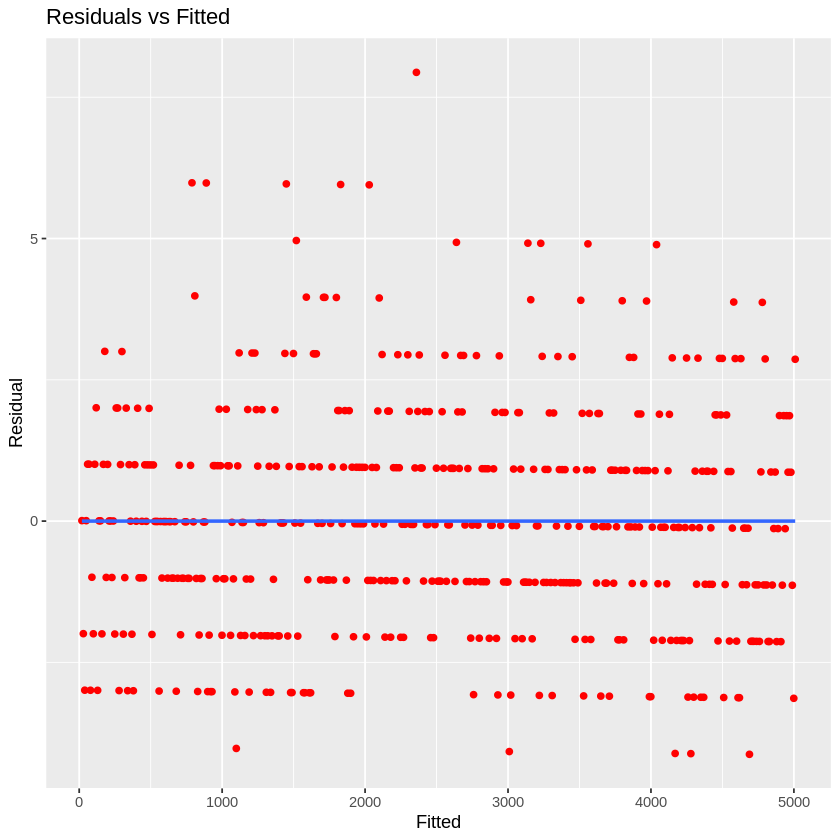

In [5]:
# Your Code Here
set.seed(53)

# Generate Data
n = 500  
x = seq(1,n,1)
e = rpois(n,4)  
y = 5 + 10*x + e  
d.data = data.frame(x=x,y=y)

# Fit Model and Predict
d.lmod = lm(data=d.data,formula=y~x)
d.diagnostic.data = data.frame(x=d.lmod$fitted,y=d.lmod$residuals)


# Diagnose Graphically
d.plot = ggplot(d.data, aes(x=x,y=y)) + geom_point(color="red") + 
         geom_smooth(data=d.data, method=lm, formula=y~x, se=FALSE) +
         labs(title="Dependent Errors") + 
         ylab("y-data") + 
         xlab("x-data")

d.diagnostic.plot = ggplot(d.diagnostic.data,aes(x=x, y=y)) + 
                    geom_point(color="red") + 
                    geom_smooth(data=d.diagnostic.data,formula=y~x,method=lm,se=FALSE) + 
                    labs(title="Residuals vs Fitted") + 
                    ylab("Residual") + 
                    xlab("Fitted")

ggplot(d.data, aes(sample=y)) +
  geom_qq() + geom_qq_line()


d.plot                                                  
d.diagnostic.plot

The qq-plot and residual vs fitted plot show that the errors are not normally distributed. The errors are non-normal

# Problem 2: Hats for Sale

Recall that the *hat* or *projection* matrix is defined as 

$$H = X(X^TX)^{-1}X^T.$$

The goal of this question is to use the hat matrix to prove that the fitted values, $\widehat{\mathbf Y}$, and the residuals, $\widehat{\boldsymbol\varepsilon}$, are uncorrelated. It's a bit of a process, so we will do it in steps.

#### 2. (a) Show that $\widehat{Y} = HY$. That is, $H$ "puts a hat on" $Y$.

$\hat{Y}=[Y_1,Y_2,...,Y_n]^T \implies (HY)_i = (X(X^TX)^{-1}X^TY)_i = [X(X^TX)^{-1}]_i\times [X^TY]_i = X_i(X^TX)^{-1}X^TY = H_iY$ 
thus $\hat{Y} = HY$.

#### 2. (b) Show that $H$ is symmetric: $H = H^T$.

$H^T = (X(X^TX)^{-1}X^T)^T = (X^T)^T((X^TX)^{-1})^TX^T = X(X^TX)^{-1}X^T = H$

#### 2. (c) Show that $H(I_n - H) = 0_n$, where $0_n$ is the zero matrix of size $n \times n$.**

$H(I_n-H) = H-H^2 = H-H = 0$

**2. (d) Stating that $\widehat{\mathbf Y}$ is uncorrelated with $\widehat{\boldsymbol\varepsilon}$ is equivalent to showing that these vectors are orthogonal.\* That is, we want their dot product to equal zero:**

$$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = 0.$$ 

Prove this result. Also explain why being uncorrelated, in this case, is equivalent to the being orthogonal.

$\hat{Y}^T\hat{\epsilon} = \hat{Y}^T(Y=\hat{Y}) = Y^TH(I_n-H)Y = 0$. Being uncorrelated in this case is equivalent to the vectors being orthogonal since their dot products are zero. 

#### 2.(e) Why is this result important in the practical use of linear regression?

$\hat{Y}$ and $\hat{\epsilon}$ are independent, so $Cov(\hat{Y},\hat{\epsilon})=0$.

## Problem 3: Model Diagnosis

We here at the University of Colorado's Department of Applied Math love Bollywood movies. So, let's analyze some data related to them!

We want to determine if there is a linear relation between the amount of money spent on a movie (it's budget) and the amount of money the movie makes. Any venture capitalists among you will certianly hope that there is at least some relation. So let's get to modelling!

#### 3. (a) Initial Inspection

Load in the data from local directory and create a linear model with `Gross` as the response and `Budget` as the feature. The data is stored in the same local directory and is called `bollywood_boxoffice.csv`. Thank the University of Florida for this specific dataset.

Specify whether each of the four regression model assumptions are being violated.

Data Source: http://www.bollymoviereviewz.com

                  Movie         Gross            Budget      
 1920London          :  1   Min.   :  0.63   Min.   :  4.00  
 2 States\xa0        :  1   1st Qu.:  9.25   1st Qu.: 19.00  
 24(Tamil,Telugu)    :  1   Median : 29.38   Median : 34.50  
 Aashiqui 2          :  1   Mean   : 53.39   Mean   : 45.25  
 AeDilHainMushkil\xa0:  1   3rd Qu.: 70.42   3rd Qu.: 70.00  
 AGentleman          :  1   Max.   :500.75   Max.   :150.00  
 (Other)             :184                                    


Call:
lm(formula = Gross ~ Budget, data = bollywood)

Residuals:
    Min      1Q  Median      3Q     Max 
-140.48  -21.39   -6.06    7.27  399.36 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.120      6.112  -1.492    0.137    
Budget         1.381      0.108  12.792   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.6 on 188 degrees of freedom
Multiple R-squared:  0.4653,	Adjusted R-squared:  0.4625 
F-statistic: 163.6 on 1 and 188 DF,  p-value: < 2.2e-16


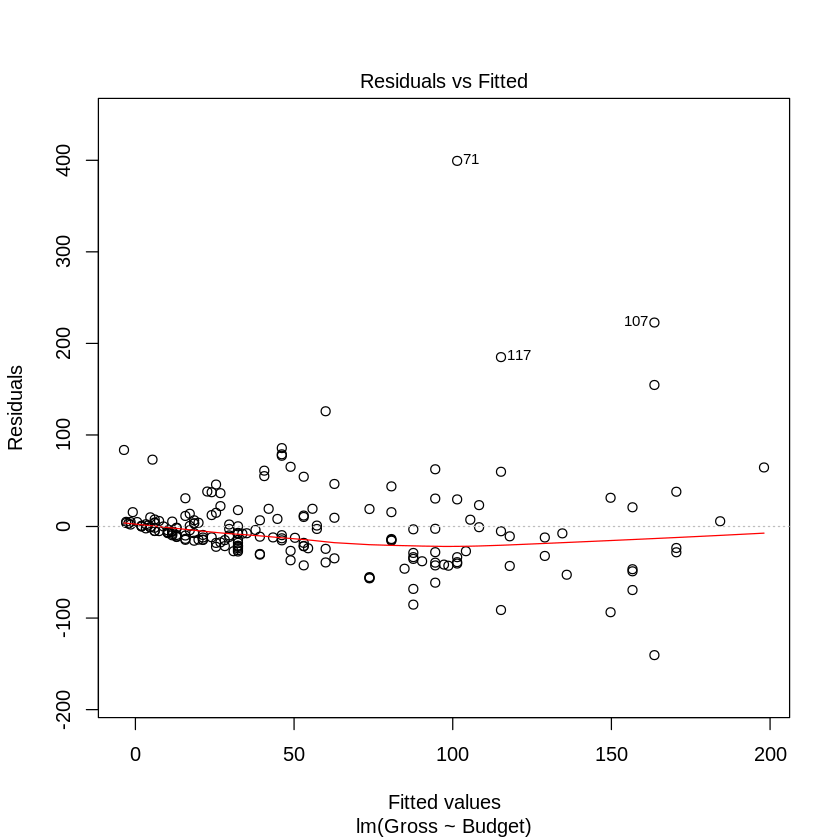

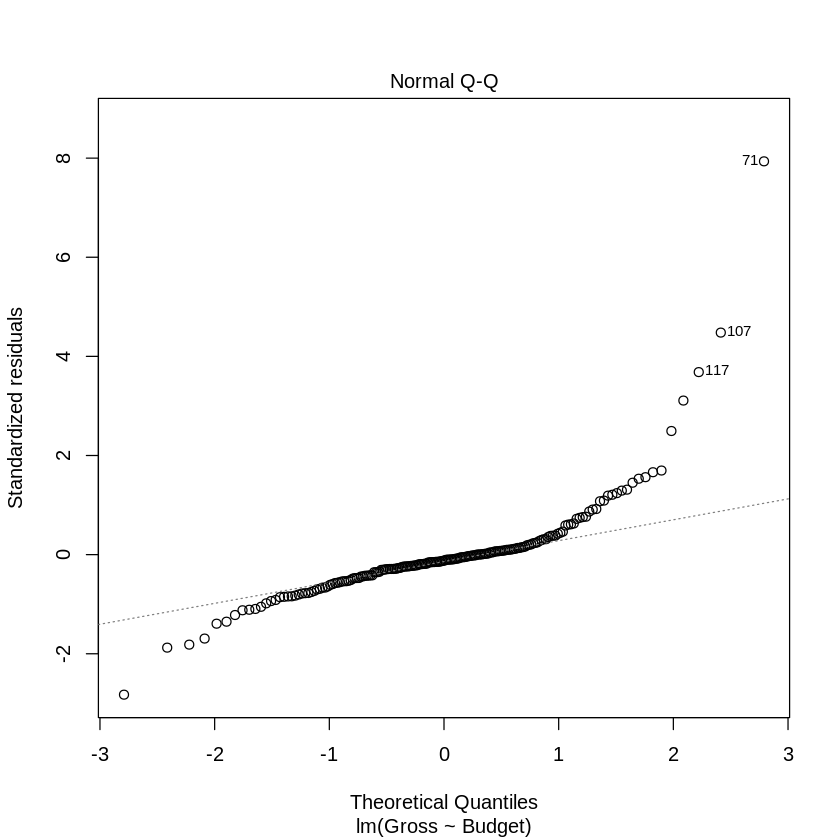

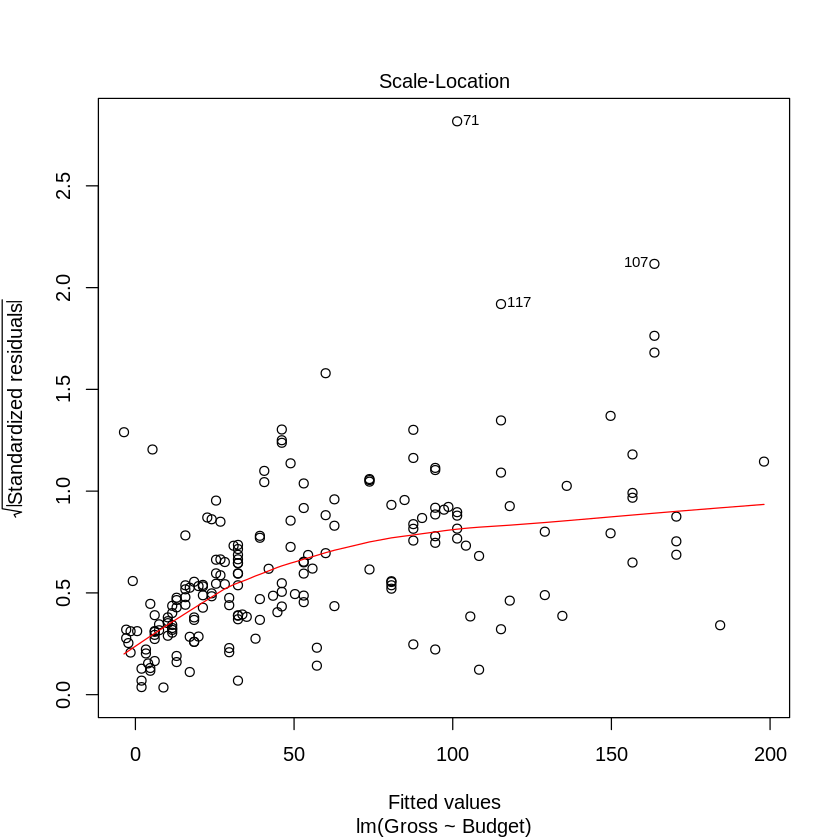


	Shapiro-Wilk normality test

data:  bollywood$Gross
W = 0.69929, p-value < 2.2e-16


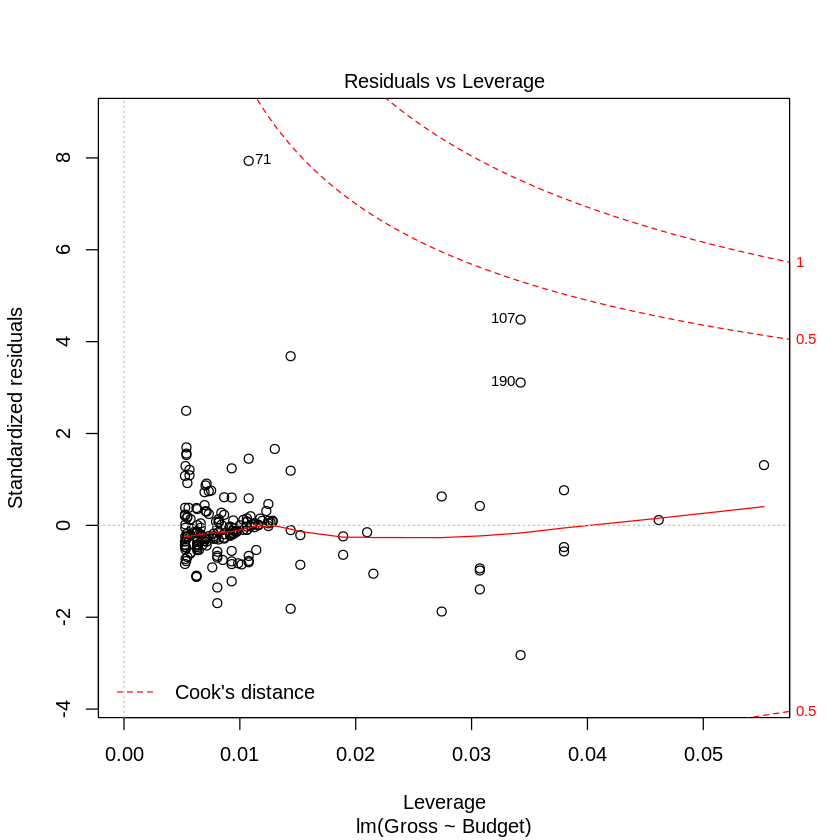

In [6]:
# Load the data
bollywood = read.csv("bollywood_boxoffice.csv")
summary(bollywood)

# Your Code Here
bollywood.m = lm(formula=Gross~Budget,data=bollywood)
summary(bollywood.m)
plot(bollywood.m)

shapiro.test(bollywood$Gross)

Checking regression assumptions:

1. Linearity - The first diagnostic plot of residuals vs fitted values shows that the relationship between variables is nonlinear. There doesn't seem to be a very specific pattern. The only concern is the model not being quite horizontal at zero. There is some curvature, so the model cannot be assumed to be linear.

2. Homoskedasticity - The residuals vs fitted values plot shows a fanning or trumpeting behavior, which implies that the principle of homoskedasticity is violated. There is variable variance in the data.

3. Independence - The kind of data allows us to imply independence between responses. There is nothing to say that a larger budget is associated with larger gross earnings. We may assume that the responses are independent.

4. Normality - The data points fall resonably along the fit of the QQ-plot and the Shapiro-Wilks test reveals that the p-value is sufficiently small to assume normality.

#### 3. (b) Transformations

Notice that the Residuals vs. Fitted Values plot has a 'trumpet" shape to it, the points have a greater spread as the Fitted value increases. This means that there is not a constant variance, which violates the homoskedasticity assumption.

So how do we address this? Sometimes transforming the predictors or response can help stabilize the variance. Experiment with transfomrations on `Budget` and/or `Gross` so that, in the transformed scale, the relationship is approximately linear with a constant variance. Limit your transformations to square root, logarithms and exponentiation. 

Note: There may be multiple transformations that fix this violation and give similar results. For the purposes of this problem, the transformed model doesn't have the be the "best" model, so long as it maintains both the linearity and homoskedasticity assumptions.

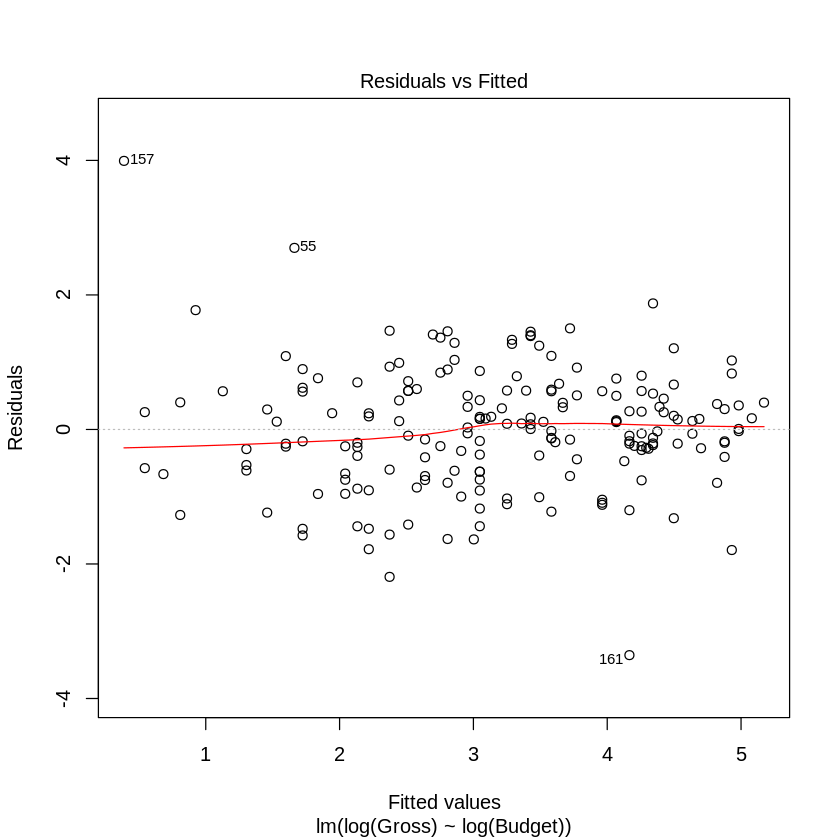

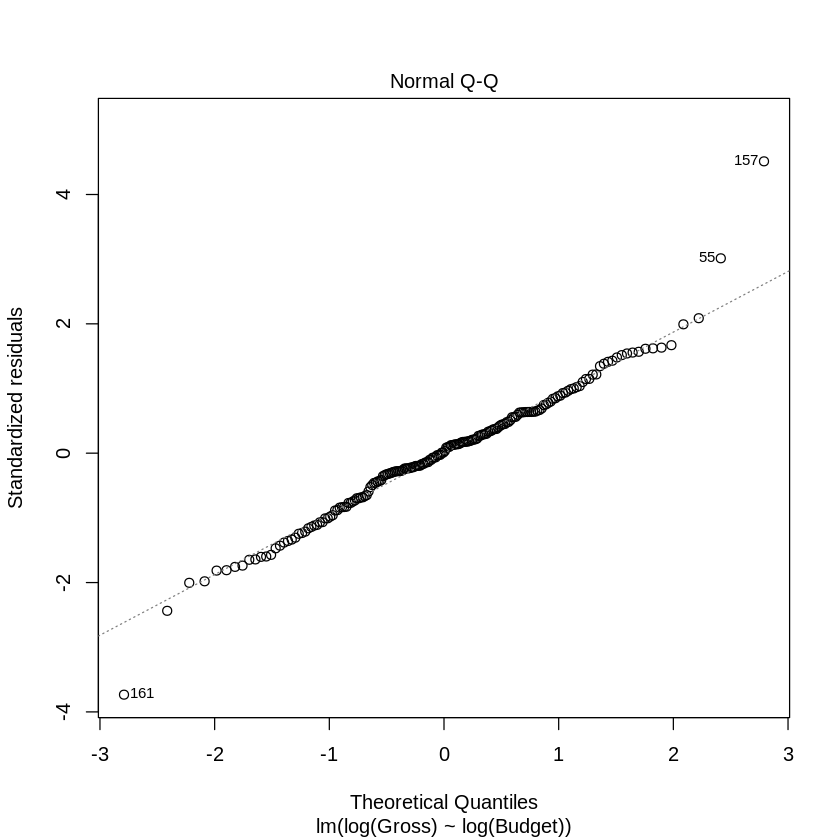

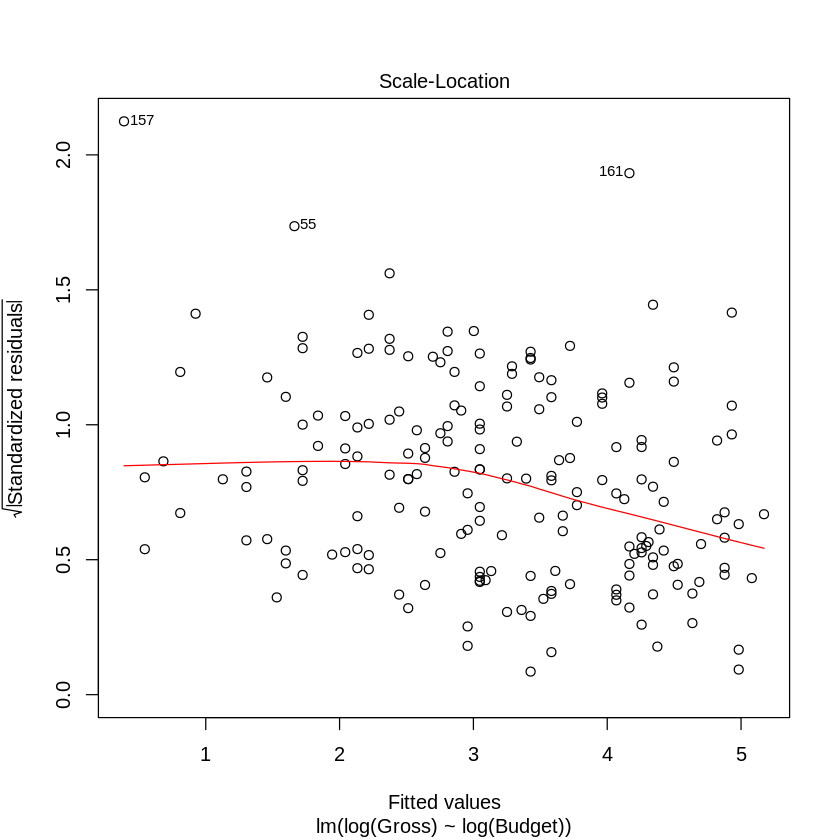

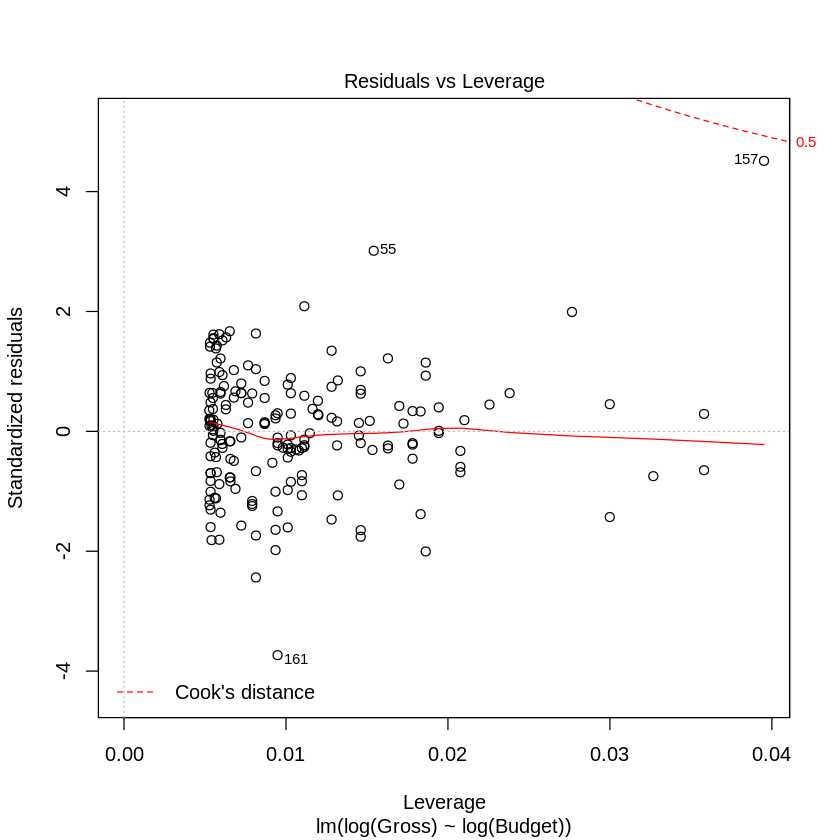

In [7]:
# Your Code Here
bollywood.m.t = lm(formula=log(Gross)~log(Budget),data=bollywood)
plot(bollywood.m.t)

#### 3. (c) Interpreting Your Transformation

You've fixed the nonconstant variance problem! Hurray! But now we have a transformed model, and it will have a different interpretation than a normal linear regression model. Write out the equation for your transformed model. Does this model have an interpretation similar to a standard linear model?

Choosing a power tranformation seems to be a much better model for the data. The new equation is $\log(y)= \beta_0 + \beta1\log(x)$. The interpretation for this model is relatively similar to that of a standard linear model.